In [1]:
import scanpy as sc
import scanpy.external as sce
import tempfile
import anndata as ad
import os
import torch
import scvi
import ray
import matplotlib.pyplot as plt
from ray import tune
from scvi import autotune
torch.set_float32_matmul_precision('high')
os.chdir("/data")
import rpy2
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


In [6]:
adata = sc.read_h5ad("h5ad/batch_corrected.h5ad")

In [7]:
adata.X = adata.layers["counts"].copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

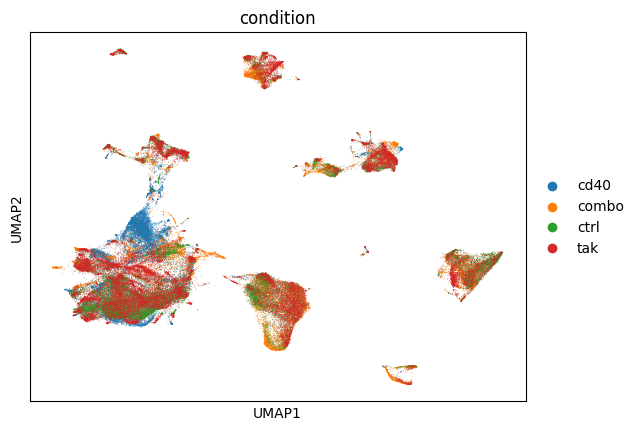

In [13]:
sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=30)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, resolution=0.4)
sc.tl.umap(adata, min_dist=0.1)
sc.pl.umap(adata, color="condition")

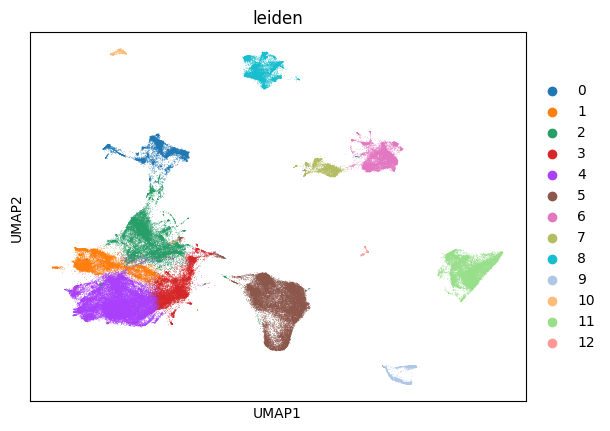

In [14]:
sc.pl.umap(adata, color="leiden")

In [10]:
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon", pts=True, use_raw=False)

In [11]:
df=sc.get.rank_genes_groups_df(adata, group=None)

In [12]:
df.to_csv("csv/wilcox_markers.csv")

In [18]:
annot={
	"0": "Fibroblasts",
	"1": "Epithelial",
	"2": "Epithelial",
	"3": "Epithelial",
	"4": "Epithelial",
	"5": "Epithelial",
	"6": "Macrophages",
	"7": "Macrophages",
	"8": "T-Cells",
	"9": "Acinar",
	"10": "B-Cells",
	"11": "Granulocytes",
	"12": "RBC"
}

In [19]:
adata.obs["annot"]=adata.obs["leiden"].map(annot)

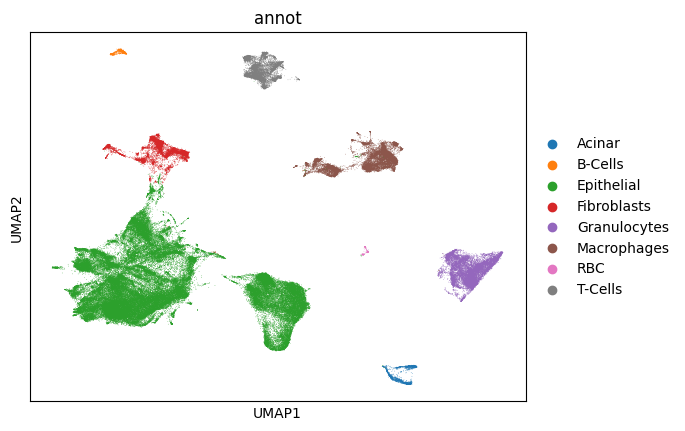

In [20]:
sc.pl.umap(adata, color="annot")

In [21]:
adata.write_h5ad("h5ad/batch_corrected.h5ad")